In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import time

## 这个练习的目的是学习神经网络的反向传播  
### 第一步 首先读取matlab格式的数据文件  
matlab文件中存储了两个矩阵X和y，通过loadmat函数转换为numpy的ndarray数据类型。X矩阵对应5000条数据的数据集，每条数据是一个20*20的灰度图像，用行向量的形式存储；y对应每个图像的分类结果

In [2]:
data = loadmat('ex4data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
X=data['X']
y=data['y']
X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)      #插入了第一列（全部为1）
#将X，y转换为numpy中的matrix,theta也初始化为matrix
X = np.matrix(X)
y = np.matrix(y)

### 数据文件可视化

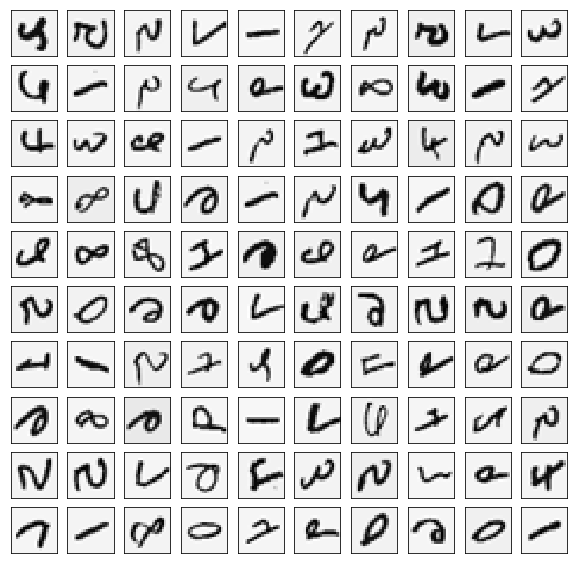

[2] [5] [5] [7] [1] [4] [5] [5] [7] [3] 

[2] [1] [5] [2] [9] [3] [8] [3] [1] [4] 

[7] [3] [2] [1] [5] [4] [3] [7] [5] [3] 

[8] [8] [2] [6] [1] [5] [2] [1] [10] [9] 

[2] [8] [8] [4] [6] [2] [9] [4] [4] [10] 

[5] [10] [6] [6] [7] [2] [6] [5] [5] [9] 

[1] [1] [5] [4] [2] [10] [7] [9] [9] [10] 

[6] [8] [6] [9] [1] [7] [2] [4] [2] [5] 

[5] [5] [7] [6] [7] [3] [5] [3] [9] [7] 

[6] [1] [8] [10] [4] [9] [10] [6] [10] [1] 



In [5]:
fig, ax = plt.subplots(10,10,figsize=(10, 10))
sample_idx = np.random.choice(np.arange(X.shape[0]), 100)  # 在400的范围内生成100个随机数
sample_images = X[sample_idx, :]
sample_ys = y[sample_idx, :]
for i in range(10):
    for j in range(10):
        image = sample_images[10*i+j].reshape((20, 20))
        ax[i][j].matshow(image, cmap=plt.cm.binary)
        ax[i][j].set_xticks(np.array([]))  # just get rid of ticks
        ax[i][j].set_yticks(np.array([]))
plt.show()
for i in range(10):
    for j in range(10):
        print(sample_ys[10*i+j],end=' ')
    print('\n')
   

### 读取matlab格式的权重数据文件  
matlab文件中存储了两个矩阵Theta1和Theta2，通过loadmat函数转换为numpy的ndarray数据类型。Theta1的shape为(25, 401),Theta2的shape为（10，26 ）

In [4]:
data2 = loadmat('ex4weights.mat')
theta1 = data2['Theta1']
theta2 = data2['Theta2']
theta1 = np.matrix(theta1)
theta2 = np.matrix(theta2)

### 定义SIGMOID函数  
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： $$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$ 合起来，我们得到逻辑回归模型的假设函数： $${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}$$

In [5]:
def sigmoid( x ):  #注意，参数x可以为一个数，也可以是ndarray
    return 1 / ( 1 + np.exp ( - x) )

### 通过神经网络进行前向预测  
注意：X，theta，y的数据类型均为numpy中的matrix。X为添加bias列的特征矩阵，theta1，theta2为第一层和第二层的参数矩阵，每行对应一个神经元的特征向量，行数即神经元的数目。返回值idx，pro为列表类型，分别对应预测分类和预测可能性${{h}_{\theta }}\left( x \right)$的值。返回值result为分类预测矩阵，对应每个分类器的预测结果，每个分类器对应result中的一列

In [57]:
def Forword( X,theta1,theta2):  #X为添加bias列的特征矩阵，theta1，theta2为第一层和第二层的参数矩阵，每行对应一个神经元的特征向量，行数即神经元的数目
    z2 = X*theta1.T
    a2 = sigmoid( z2 )
    a2 = a2.A
    a2 = np.insert(a2, 0, values=np.ones(a2.shape[0]), axis=1)
    a2 = np.matrix(a2)
    z3 = a2*theta2.T
    a3 = sigmoid( z3 )
    result = a3.A     #result对应
    idx = np.argmax(result, axis=1)+1 #每行最大值的下标，+1是对应的预测值
    pro = np.amax(result, axis=1)   #每行最大值
    result = np.matrix(a3)
    return result,idx,pro
Hypo,idx,pro = Forword(X,theta1,theta2)
correct = [1 if (a == b) else 0 for (a, b) in zip(idx, y)]      #注意学习此处语法
accuracy = sum(correct) / len(correct)
accuracy

0.8492

### 定义前向预测的代价函数  
注意：X，theta，y的数据类型均为numpy中的matrix。X为特征矩阵，theta为列向量，y为列向量
注意：如果使用a=b（a，b为矩阵）, 则a只是建立一个对b的引用，所有对a的操作都会改变b的值

In [7]:
def ComputeCost(Hypo,y): #Hype为前向预测矩阵，每列对应一个分类器的预测结果，y为结果矩阵，每行对应一个数据的预测结果，结果用行向量表示，对应分类为1，其他分类为0
#此处的核心点是通过向量乘法计算针对每条数据的多个分类器的误差和。然后通过for循环计算对所有数据的误差和
    cost = np.zeros( y.shape[0] )
    for i in range(y.shape[0]):
        first = ( -y[i] )* np.log(Hypo[i].T)
        second = ( 1-y[i] )* np.log( 1-Hypo[i].T)
        cost[i] = (first - second)
    return  np.sum(cost)/len(X)

### 计算theta1,theta2对应的代价

In [8]:
ymat = np.zeros((y.shape[0],theta2.shape[0]))
for i in range(y.shape[0]):
    ymat[i,y[i,0]-1] = 1
cost = ComputeCost(Hypo,ymat)
cost

0.2876291651613189


### regularized cost（正则化代价函数）
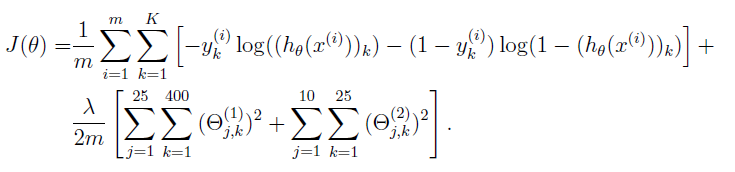

In [9]:
def ComputeCost_Reg(Hypo,y,theta1,theta2,numda): #Hypo为前向预测矩阵，每列对应一个分类器的预测结果，y为结果矩阵，每行对应一个数据的预测结果，结果用行向量表示，对应分类为1，其他分类为0
    cost = np.zeros( y.shape[0] )
    for i in range(y.shape[0]):
        first = ( -y[i] )* np.log(Hypo[i].T)
        second = ( 1-y[i] )* np.log( 1-Hypo[i].T)
        cost[i] = (first - second)/len(X)
    theta1_reg = theta1[:,1:]
    theta2_reg = theta2[:,1:]
    reg = (numda / (2 * len(X))) * ( np.sum(np.power(theta1, 2)) + np.sum(np.power(theta2, 2)) )
    return  np.sum(cost)+reg


In [28]:
ymat = np.zeros((y.shape[0],theta2.shape[0]))
for i in range(y.shape[0]):
    ymat[i,y[i,0]-1] = 1
cost = ComputeCost_Reg(Hypo,ymat,theta1,theta2,1)
cost

0.3844877962428939

## 下面开始实现神经网络的反向传播  
### 首先定义sigmoid的导函数  
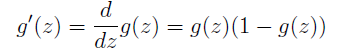

In [28]:
def sigmoid_Gradient( x ):  #注意，参数x可以为一个数，也可以是ndarray
    return np.multiply(sigmoid(x),( 1 - sigmoid ( x ) ) )

可视化sigmoid函数，看看sigmoid函数是否正确

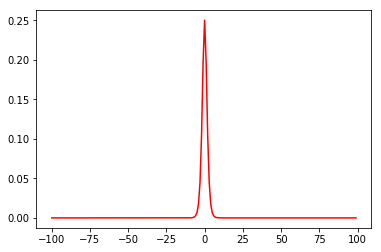

In [30]:
num = np.arange(-100,100)
plt.plot( num,sigmoid_Gradient(num), 'r-')

### 反向传播函数  
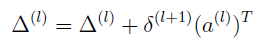   
对矩阵进行扁平化  
np.concatenate((np.ravel(a), np.ravel(b)))  
seq[:25 * 401].reshape(25, 401), seq[25 * 401:].reshape(10, 26)

In [35]:
def backprop(X,theta1,theta2,result):  #对于包含一个隐藏层的三层神经网络应用反向传播
#X为添加bias列的特征矩阵，theta1，theta2为第一层和第二层的参数矩阵，每行对应一个神经元的特征向量，行数即下一层神经元的数目
#theta1，theta2为第一层和第二层的参数矩阵，每行对应一个神经元的特征向量，行数即神经元的数目
#从数据文件中读入的y对应的是一个表示类别的数字，result是将y转换成对应的结果向量，用1或0分别表示对应分类的结果
    m = X.shape[0]         #5000
    
    #首先通过前向传播进行预测
    z2 = X*theta1.T                 #(5000,25)
    a2 = sigmoid( z2 )              
    a2 = a2.A
    a2 = np.insert(a2, 0, values=np.ones(a2.shape[0]), axis=1)
    a2 = np.matrix(a2)               #(5000,26)
    z3 = a2*theta2.T                 #(5000,10)
    a3 = sigmoid( z3 )               #(5000,10)
    
    # initializations
    delta1 = np.zeros(theta1.shape)    # (25, 401)
    delta2 = np.zeros(theta2.shape)    # (10, 26)
    
    for i in range(m):
        error3 = (a3[i]-result[i]).T      #(10,1) ,对应每个分类的误差,也就是计算出输出层每个神经元的误差
        error2 = np.multiply(( theta2.T*error3 )[1:] , sigmoid_Gradient( z2[i] ).T) #计算隐藏层25个神经元的误差，theta2.T*error3为（26，1）向量
        delta2 = delta2 + error3 * a2[i]    #(10,26)
        delta1 = delta1 + error2 * X[i]     #(25,401)
    delta1 = delta1/m
    delta2 = delta2/m
    return delta1,delta2
        
        
        

In [46]:
start = time.time()
theta = np.random.uniform(-0.12, 0.12, 10285)   # 25*401 + 10*26
theta1 = theta[:25 * 401].reshape(25, 401)
theta2 = theta[25 * 401:].reshape(10, 26)
ymat = np.zeros((y.shape[0],theta2.shape[0]))
for i in range(y.shape[0]):
    ymat[i,y[i,0]-1] = 1
iters = 100
cost = np.zeros(iters)
for i in range(iters):
    delta1 ,delta2 = backprop(X,theta1,theta2,ymat)
    theta1 = theta1 - delta1
    theta2 = theta2 - delta2
    Hypo,idx,pro = Forword(X,theta1,theta2)
    cost[i] = ComputeCost(Hypo,ymat)
elapsed = time.time() - start
elapsed

47.04344034194946

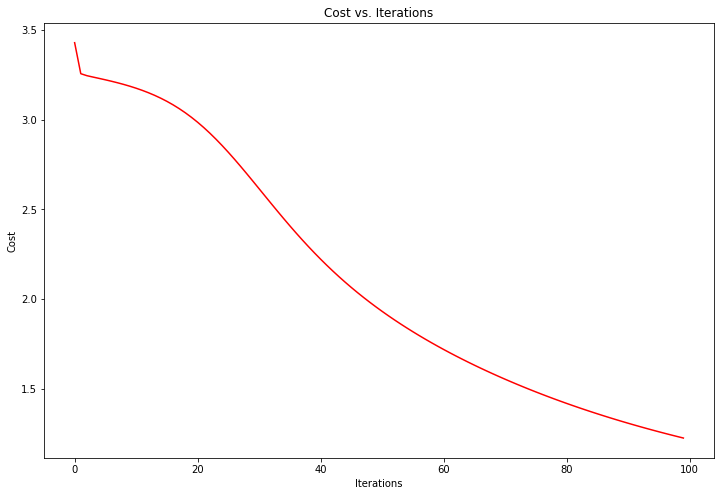

In [47]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters), cost, 'r', label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')

plt.show()

### 正则化反向传播  
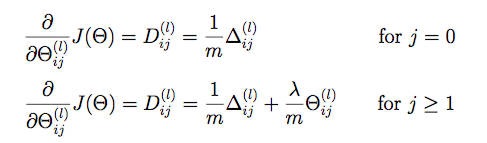

In [54]:
def backprop_reg(X,theta1,theta2,result,numda):  #对于包含一个隐藏层的三层神经网络应用反向传播
#X为添加bias列的特征矩阵，theta1，theta2为第一层和第二层的参数矩阵，每行对应一个神经元的特征向量，行数即下一层神经元的数目
#theta1，theta2为第一层和第二层的参数矩阵，每行对应一个神经元的特征向量，行数即神经元的数目
#从数据文件中读入的y对应的是一个表示类别的数字，result是将y转换成对应的结果向量，用1或0分别表示对应分类的结果
    m = X.shape[0]
    delta1,delta2 = backprop(X,theta1,theta2,result)
    theta1[:, 0] = 0
    reg_term_d1 = (numda / m) * theta1
    delta1 = delta1 + reg_term_d1

    theta2[:, 0] = 0
    reg_term_d2 = (numda / m) * theta2
    delta2 = delta2 + reg_term_d2

    return delta1, delta2
        
        
        

In [55]:
start = time.time()
theta = np.random.uniform(-0.12, 0.12, 10285)   # 25*401 + 10*26
theta1 = theta[:25 * 401].reshape(25, 401)
theta2 = theta[25 * 401:].reshape(10, 26)
ymat = np.zeros((y.shape[0],theta2.shape[0]))
for i in range(y.shape[0]):
    ymat[i,y[i,0]-1] = 1
iters = 100
numda = 1
cost = np.zeros(iters)
for i in range(iters):
    delta1 ,delta2 = backprop_reg(X,theta1,theta2,ymat,numda)
    theta1 = theta1 - delta1
    theta2 = theta2 - delta2
    Hypo,idx,pro = Forword(X,theta1,theta2)
    cost[i] = ComputeCost(Hypo,ymat)
elapsed = time.time() - start
elapsed

46.994603395462036

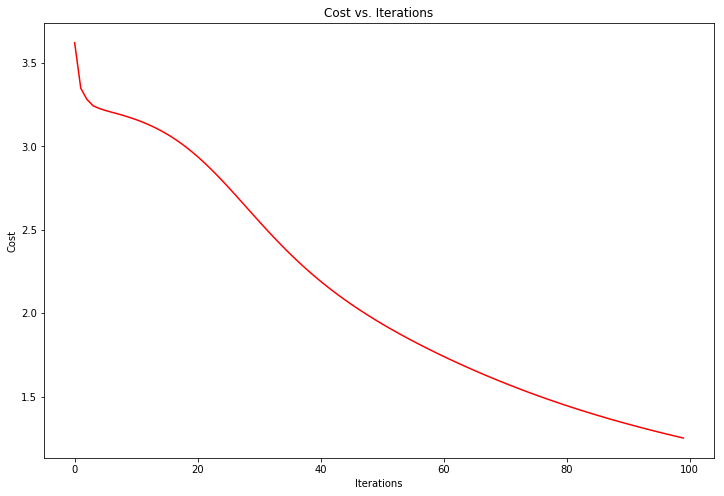

In [56]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters), cost, 'r', label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')

plt.show()